## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure

import pandas_profiling

## Importing the data

In [2]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/antunes-lima/Python-Movie-Industry-Analysis/main/movies.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1320k  100 1320k    0     0  5060k      0 --:--:-- --:--:-- --:--:-- 5060k


In [3]:
df = pd.read_csv('/content/movies.csv')

df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1356,Critters 2,PG-13,Comedy,1988,"April 29, 1988 (United States)",5.5,14000.0,Mick Garris,David Twohy,Scott Grimes,United States,4500000.0,3813293.0,New Line Cinema,86.0
3781,Dr. T & the Women,R,Comedy,2000,"October 13, 2000 (United States)",4.6,18000.0,Robert Altman,Anne Rapp,Richard Gere,United States,23000000.0,22844291.0,Artisan Entertainment,122.0
4292,Bad Boys II,R,Action,2003,"July 18, 2003 (United States)",6.6,237000.0,Michael Bay,George Gallo,Will Smith,United States,130000000.0,273339556.0,Columbia Pictures,147.0
1599,Slaves of New York,R,Comedy,1989,March 1989 (United States),5.7,917.0,James Ivory,Tama Janowitz,Bernadette Peters,United States,NaN,463972.0,TriStar Pictures,124.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
6685,Home,PG,Animation,2015,"March 27, 2015 (United States)",6.6,95000.0,Tim Johnson,Tom J. Astle,Jim Parsons,United States,135000000.0,386041607.0,DreamWorks Animation,94.0
238,Zapped!,R,Comedy,1982,"September 3, 1982 (United States)",4.9,6500.0,Robert J. Rosenthal,Bruce Rubin,Scott Baio,United States,NaN,16897768.0,Embassy Pictures,98.0
5767,Rubber,R,Comedy,2010,"November 10, 2010 (France)",5.8,35000.0,Quentin Dupieux,Quentin Dupieux,Stephen Spinella,France,500000.0,101729.0,Realitism Films,82.0
2264,Groundhog Day,PG,Comedy,1993,"February 12, 1993 (United States)",8.0,589000.0,Harold Ramis,Danny Rubin,Bill Murray,United States,14600000.0,71074049.0,Columbia Pictures,101.0
6352,Blood Ties,R,Action,2013,"October 30, 2013 (France)",6.5,19000.0,Guillaume Canet,Guillaume Canet,Clive Owen,France,25500000.0,2566435.0,Trésor Films,127.0


In [5]:
# changing the number of rows that pandas show to us

pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', 10)

## Initial look at the data

In [4]:
#!pip install pandas-profiling==2.7.1

In [6]:
#from pandas_profiling import ProfileReport

#profile_df = ProfileReport(df)

#profile_df.to_notebook_iframe()


#OBS
#Pandas v1.3 renamed the ABCIndexClass to ABCIndex. 
#The visions dependency of the pandas-profiling package hasn't caught up yet, and so throws an error when it can't find ABCIndexClass. 
#Downgrading pandas to the 1.2.x series will resolve the issue.

#Alternatively, you can just wait for the visions package to be updated.


In [7]:
# checking data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# checking df shape (rows, columns)

df.shape

(7668, 15)

In [9]:
# checking how many null values on each column

df.isnull().sum(axis=0)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [10]:
# checking percent of missing values

for col in df.columns:
  missing = round(np.mean(df[col].isnull())*100, 2)
  print('{} - {}%'.format(col, missing))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.0%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [11]:
# checking how many unique values on each column

df.nunique()

name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       59
budget       413
gross       7472
company     2385
runtime      138
dtype: int64

## Starting Data Cleaning

In [12]:
# some films have year != release date year
# spliting the released column and creating a new column with the year from released

df['year_release'] = df['released'].astype('str').str.split(n=4, expand=True)[2]

df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release
5406,Fireproof,PG,Drama,2008,"September 26, 2008 (United States)",6.5,22000.0,Alex Kendrick,Alex Kendrick,Kirk Cameron,United States,500000.0,33473297.0,Samuel Goldwyn Films,122.0,2008
7426,Padmaavat,Not Rated,Drama,2018,"January 25, 2018 (India)",7.0,29000.0,Sanjay Leela Bhansali,Prakash Kapadia,Deepika Padukone,India,NaN,60508780.0,Bhansali Productions,164.0,2018
2267,Sleepless in Seattle,PG,Comedy,1993,"June 25, 1993 (United States)",6.8,165000.0,Nora Ephron,Jeff Arch,Tom Hanks,United States,21000000.0,227927165.0,TriStar Pictures,105.0,1993
7434,Kin,PG-13,Action,2018,"August 31, 2018 (United States)",5.8,16000.0,Jonathan Baker,Jonathan Baker,Myles Truitt,United States,30000000.0,10313019.0,Summit Entertainment,102.0,2018
1958,Europa,R,Drama,1991,"June 27, 1991 (Germany)",7.6,20000.0,Lars von Trier,Lars von Trier,Barbara Sukowa,Denmark,NaN,1015007.0,Alicéléo,112.0,1991
2707,The American President,PG-13,Comedy,1995,"November 17, 1995 (United States)",6.8,54000.0,Rob Reiner,Aaron Sorkin,Michael Douglas,United States,62000000.0,107879496.0,Universal Pictures,114.0,1995
4813,The Weather Man,R,Comedy,2005,"October 28, 2005 (United States)",6.5,78000.0,Gore Verbinski,Steve Conrad,Nicolas Cage,United States,22000000.0,19126398.0,Paramount Pictures,102.0,2005
7016,Our Kind of Traitor,R,Crime,2016,"May 13, 2016 (United Kingdom)",6.2,21000.0,Susanna White,John le Carré,Carlos Acosta,United Kingdom,NaN,10711027.0,StudioCanal,108.0,2016
6448,Captain America: The Winter Soldier,PG-13,Action,2014,"April 4, 2014 (United States)",7.7,764000.0,Anthony Russo,Christopher Markus,Chris Evans,United States,170000000.0,714421503.0,Marvel Entertainment,136.0,2014
6027,Atlas Shrugged: Part I,PG-13,Drama,2011,"April 15, 2011 (United States)",5.6,13000.0,Paul Johansson,Brian Patrick O'Toole,Taylor Schilling,United States,20000000.0,4627375.0,Atlas Productions,97.0,2011


In [13]:
# checking the results

df.year_release.value_counts(dropna=False).tail(10)

1984           156
1983           143
1982           126
1981           102
1980            79
(United         45
2020            32
NaN              6
States)          6
(Australia)      2
Name: year_release, dtype: int64

In [14]:
# did not work for some value that did not have month/day

df.sort_values(by=['year_release'], inplace=False, ascending=True).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release
5958,The Human Centipede II (Full Sequence),Not Rated,Horror,2011,November 2011 (Australia),3.8,37000.0,Tom Six,Tom Six,Laurence R. Harvey,Netherlands,NaN,170323.0,Six Entertainment Company,91.0,(Australia)
5833,Hatchet II,R,Action,2010,November 2010 (Australia),5.5,13000.0,Adam Green,Adam Green,Danielle Harris,United States,800000.0,156190.0,ArieScope Pictures,85.0,(Australia)
463,Slayground,R,Crime,1983,February 1984 (United States),4.9,360.0,Terry Bedford,Trevor Preston,Peter Coyote,United Kingdom,NaN,108128.0,Jennie and Company,89.0,(United
2029,Liebestraum,R,Mystery,1991,November 1991 (United States),5.9,1500.0,Mike Figgis,Mike Figgis,Kevin Anderson,United States,6900000.0,133645.0,Initial Entertainment Group (IEG),112.0,(United
1735,The Comfort of Strangers,R,Drama,1990,April 1991 (United States),6.3,5000.0,Paul Schrader,Ian McEwan,Christopher Walken,United States,NaN,1244381.0,Erre Produzioni,107.0,(United
1753,Life Is Sweet,R,Comedy,1990,December 1991 (United States),7.5,9500.0,Mike Leigh,Mike Leigh,Alison Steadman,United Kingdom,NaN,1516414.0,British Screen Productions,103.0,(United
1765,The Field,PG-13,Drama,1990,March 1991 (United States),7.4,5800.0,Jim Sheridan,Jim Sheridan,Richard Harris,Ireland,NaN,1494399.0,Granada Television,107.0,(United
1772,Ju Dou,PG-13,Drama,1990,April 1991 (United States),7.7,7800.0,Yimou Zhang,Heng Liu,Gong Li,China,NaN,1986433.0,China Film Co-Production Corporation,95.0,(United
1797,Hidden Agenda,R,Drama,1990,January 1991 (United States),6.9,3700.0,Ken Loach,Jim Allen,Frances McDormand,United Kingdom,NaN,1232210.0,Hemdale,108.0,(United
1804,My Father's Glory,G,Adventure,1990,August 1991 (United States),7.6,6200.0,Yves Robert,Louis Nucéra,Philippe Caubère,France,NaN,1730856.0,Gaumont,105.0,(United


Trying another method:

In [15]:
# searching for 4 digits in the release date using a regular expression, and using it as year of release

df['year_release'] = df['released'].str.extract(r'(\d{4})', expand=False)

df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release
2160,Mo' Money,R,Action,1992,"July 24, 1992 (United States)",5.5,7200.0,Peter MacDonald,Damon Wayans,Damon Wayans,United States,10000000.0,40227006.0,Columbia Pictures,89.0,1992
820,Colonel Redl,R,Biography,1985,"October 4, 1985 (United States)",7.5,2800.0,István Szabó,István Szabó,Klaus Maria Brandauer,Yugoslavia,NaN,2357.0,Manfred Durniok Filmproduktion,144.0,1985
3739,Center Stage,PG-13,Drama,2000,"May 12, 2000 (United States)",6.7,19000.0,Nicholas Hytner,Carol Heikkinen,Amanda Schull,United States,29000000.0,26385941.0,Columbia Pictures,115.0,2000
5709,Salt,PG-13,Action,2010,"July 23, 2010 (United States)",6.4,301000.0,Phillip Noyce,Kurt Wimmer,Angelina Jolie,United States,110000000.0,293503354.0,Columbia Pictures,100.0,2010
5803,The Extra Man,R,Comedy,2010,"January 27, 2011 (Greece)",5.8,4800.0,Shari Springer Berman,Robert Pulcini,Kevin Kline,France,7000000.0,649626.0,3 Arts Entertainment,108.0,2011
1868,The Beautiful Troublemaker,Unrated,Drama,1991,"September 4, 1991 (France)",7.6,7500.0,Jacques Rivette,Pascal Bonitzer,Michel Piccoli,France,NaN,403056.0,Pierre Grise Productions,238.0,1991
5019,Peaceful Warrior,PG-13,Drama,2006,"June 23, 2006 (United States)",7.3,27000.0,Victor Salva,Kevin Bernhardt,Scott Mechlowicz,United States,10000000.0,4326927.0,DEJ Productions,120.0,2006
6606,A Long Way Down,R,Comedy,2014,"June 5, 2014 (United States)",6.4,32000.0,Pascal Chaumeil,Nick Hornby,Pierce Brosnan,United Kingdom,12000000.0,7257942.0,Wildgaze Films,96.0,2014
375,The Meaning of Life,R,Comedy,1983,"March 31, 1983 (United States)",7.5,115000.0,Terry Jones,Graham Chapman,John Cleese,United Kingdom,9000000.0,14949697.0,Celandine Films,107.0,1983
2756,Fair Game,R,Action,1995,"November 3, 1995 (United States)",4.3,12000.0,Andrew Sipes,Paula Gosling,William Baldwin,United States,50000000.0,11534477.0,Warner Bros.,91.0,1995


In [16]:
# better sollution now, but now we have 2 nulls because the release date has 2 null values.

df.year_release.value_counts(dropna=False)

2019    228
2015    213
2011    212
2007    212
1986    211
2003    207
1994    206
2001    205
2018    205
1998    205
2008    204
1991    204
2017    203
1995    203
2000    200
1993    200
2013    200
2005    200
1989    200
1996    199
1988    199
2016    198
1997    198
1990    197
2014    196
1987    196
2006    196
1999    196
2002    193
2010    193
2009    192
2012    192
2004    191
1992    184
1985    183
1984    157
1983    145
1982    128
1981    103
1980     80
2020     32
NaN       2
Name: year_release, dtype: int64

In [17]:
# The original year column did not have nulls, so we are going to get year from there for the null cases

df.year_release.fillna(df.year, inplace=True)

df.year_release.value_counts(dropna=False)

2019    228
2015    213
2011    212
2007    212
1986    211
2003    207
1994    206
2001    205
2018    205
1998    205
2008    204
1991    204
2017    203
1995    203
2000    200
1993    200
2013    200
2005    200
1989    200
1996    199
1988    199
2016    198
1997    198
1990    197
2014    196
1987    196
2006    196
1999    196
2002    193
2010    193
2009    192
2012    192
2004    191
1992    184
1985    183
1984    157
1983    145
1982    128
1981    103
1980     80
2020     32
2010      2
Name: year_release, dtype: int64

## Company Income Aggregation

In [18]:
# sorting the table by film relevance, using gross column for this

df.sort_values(by=['gross'], inplace=False, ascending=False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0,2019


In [19]:
# generating a list of the largest companies by gross income

df_company = df.groupby('company', as_index=False).agg({'gross' : 'sum'})

df_company.sort_values(by=['gross'], inplace=True, ascending=False)

df_company.head(10)

,company,gross
2319,Warner Bros.,5.649142e+10
2281,Universal Pictures,5.251419e+10
731,Columbia Pictures,4.300894e+10
1812,Paramount Pictures,4.049361e+10
2253,Twentieth Century Fox,4.025705e+10
2316,Walt Disney Pictures,3.632789e+10
1713,New Line Cinema,1.988380e+10
1606,Marvel Studios,1.506559e+10
887,DreamWorks Animation,1.187361e+10
2232,Touchstone Pictures,1.179583e+10


## Scatter Plot of Budget and Gross Income

In [20]:
# changing the default graph size

plt.rcParams['figure.figsize'] = [15, 15]

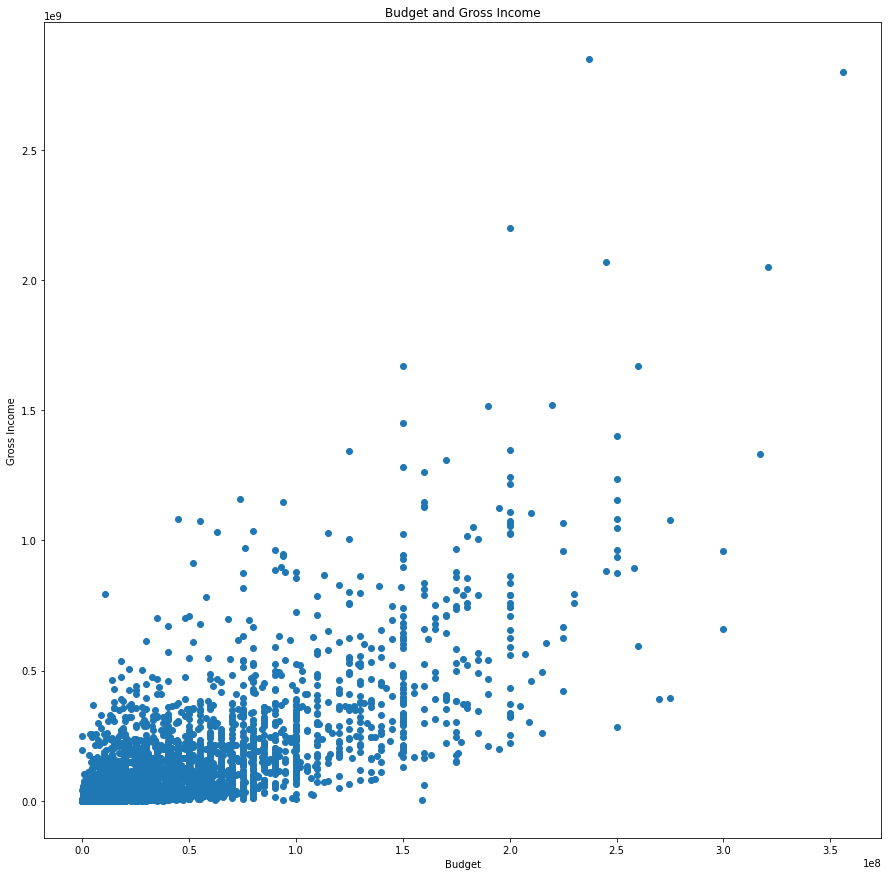

In [21]:
# generating a scatter plot of budget and gross income (using matplotlib)

plt.scatter(x=df['budget'],
            y=df['gross'])

plt.title('Budget and Gross Income')
plt.xlabel('Budget')
plt.ylabel('Gross Income')

plt.show()

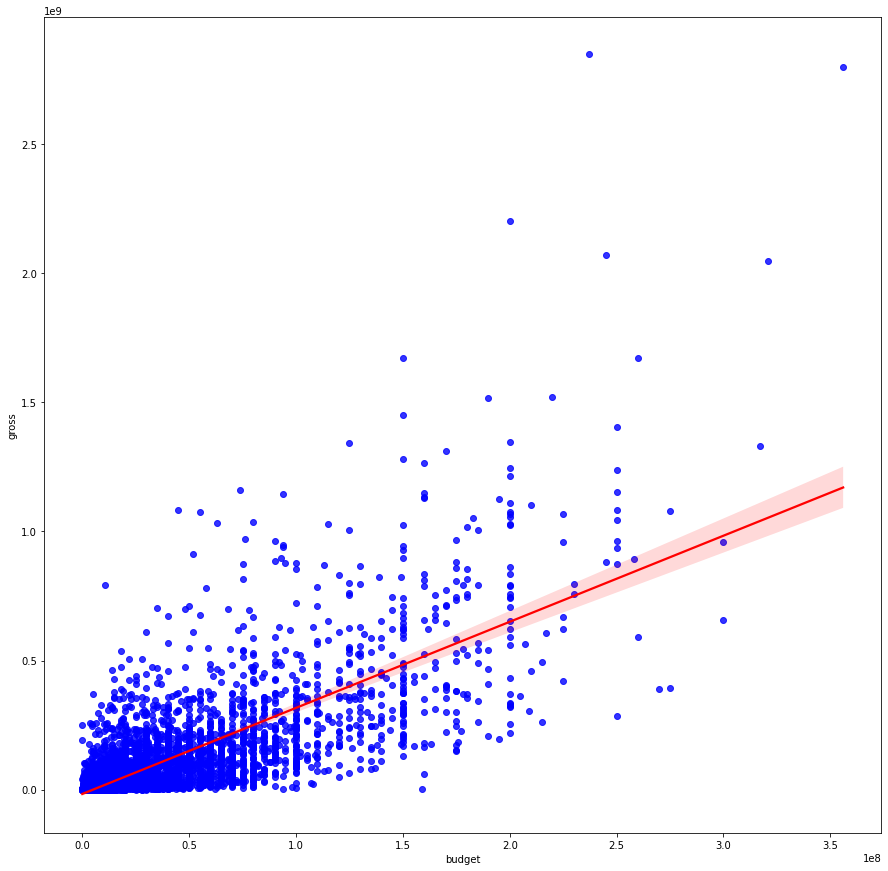

In [23]:
# generating a scatter plot of budget and gross income (using seaborn)
# with regression line

sns.regplot(data=df, 
            x='budget',
            y='gross',
            scatter_kws={"color":"blue"},
            line_kws={"color":"red"})

## Checking Correlations

In [24]:
# calculating the actual correlation

# pearson method, measures how close it is to a linear correlation

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [25]:
# spearman method, measures how close it is to a monotonic function (non-linear correlation)

df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


In [26]:
# kendall method, similar to spearman, as it's also a rank correlation, also measures a monotonic relationship (non-linear correlation)

df.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


For this data, we will stick with Pearson's correlation, because it turned out to be well placed on the chart. The data seems to follow well a linear correlation.

From this table we can see that the correlation of budget vs gross income is equal to 0.740395

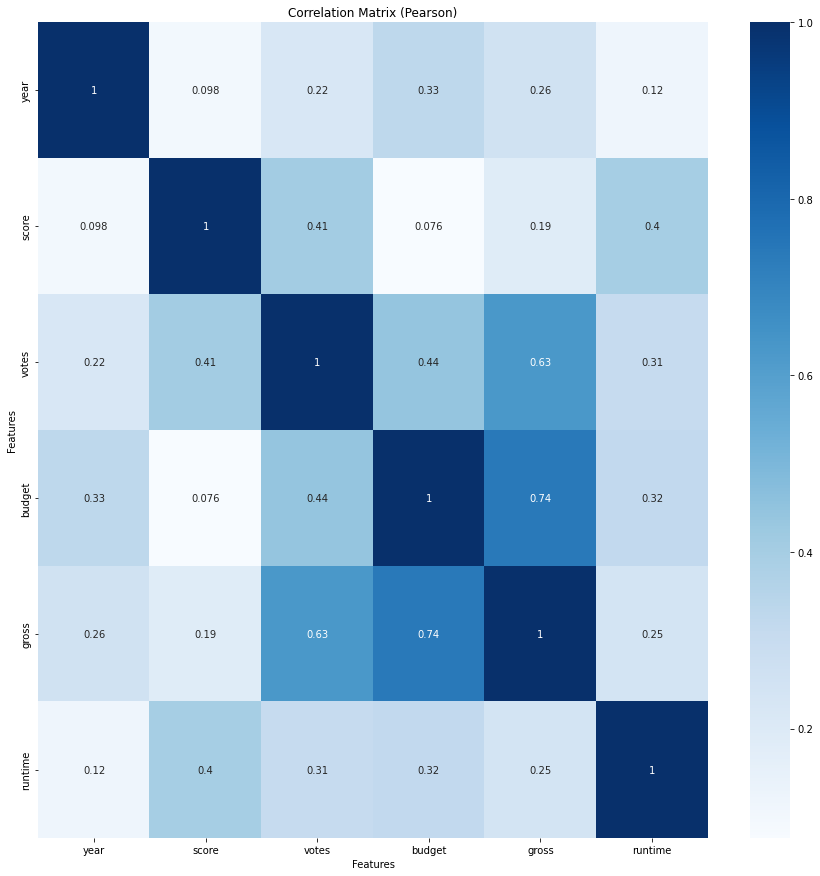

In [27]:
# making a correlation matrix, using seaborn heat map

correlation = df.corr(method='pearson')

sns.heatmap(correlation, annot=True, cbar=True, cmap='Blues')

plt.title('Correlation Matrix (Pearson)')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()


## Standardizing Date Info

In [28]:
# coming back to data types

df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget          float64
gross           float64
company          object
runtime         float64
year_release     object
dtype: object

In [29]:
# extracting also the month from released, to a new column

df['month_release'] = df['released'].str.split(pat='(', expand=True)[0]

df.month_release.value_counts(dropna=False).head(10)

October 4, 1991        9
May 17, 2019           9
February 14, 1986      9
January 21, 2000       8
August 9, 2019         8
August 26, 2016        8
September 29, 2017     8
November 6, 1987       8
October 21, 1988       8
January 19, 2001       8
Name: month_release, dtype: int64

In [30]:
# Extracting the first 3 letters from month name, which will be enough to later convert no numbers

df['month_release'] = df['month_release'].str.extract(r'(^[a-zA-Z]{3})', expand=False)

df.month_release.value_counts(dropna=False)

Oct    758
Aug    738
Mar    684
Nov    657
Sep    652
Apr    647
Feb    614
Jan    599
Jul    584
May    581
Dec    581
Jun    561
NaN     12
Name: month_release, dtype: int64

In [31]:
# now converting the 3 letters to months number

df.month_release = df.month_release.str.replace(pat='Jan', repl='01', regex=False)
df.month_release = df.month_release.str.replace(pat='Feb', repl='02', regex=False)
df.month_release = df.month_release.str.replace(pat='Mar', repl='03', regex=False)
df.month_release = df.month_release.str.replace(pat='Apr', repl='04', regex=False)
df.month_release = df.month_release.str.replace(pat='May', repl='05', regex=False)
df.month_release = df.month_release.str.replace(pat='Jun', repl='06', regex=False)
df.month_release = df.month_release.str.replace(pat='Jul', repl='07', regex=False)
df.month_release = df.month_release.str.replace(pat='Aug', repl='08', regex=False)
df.month_release = df.month_release.str.replace(pat='Sep', repl='09', regex=False)
df.month_release = df.month_release.str.replace(pat='Oct', repl='10', regex=False)
df.month_release = df.month_release.str.replace(pat='Nov', repl='11', regex=False)
df.month_release = df.month_release.str.replace(pat='Dec', repl='12', regex=False)

df.month_release.value_counts(dropna=False)

10     758
08     738
03     684
11     657
09     652
04     647
02     614
01     599
07     584
05     581
12     581
06     561
NaN     12
Name: month_release, dtype: int64

In [32]:
# extracting also the day from released, to a new column

df['day_release'] = df['released'].str.split(pat='(', expand=True)[0]
df['day_release'] = df['day_release'].str.split(pat=',', expand=True)[0]

df.day_release.value_counts(dropna=False).head(10)

December 25     112
December 21      44
November 21      41
November 22      37
February 14      36
September 25     36
October 21       35
August 15        34
October 4        33
January 13       32
Name: day_release, dtype: int64

In [33]:
# searching for the 2 digit number to extract the day

df['day_release'] = df['day_release'].str.extract(r'(?:\D+)(\d{1,2})$', expand=False)

df.day_release.value_counts(dropna=False)

25     363
21     307
19     282
22     279
18     276
20     276
16     268
13     262
14     259
17     258
26     256
10     256
12     255
9      255
11     250
1      250
15     242
24     236
6      234
23     234
3      230
8      226
30     226
7      224
27     222
2      215
28     213
4      211
5      210
29     203
31     131
NaN     59
Name: day_release, dtype: int64

In [34]:
# checking new data types

df.dtypes

name              object
rating            object
genre             object
year               int64
released          object
score            float64
votes            float64
director          object
writer            object
star              object
country           object
budget           float64
gross            float64
company           object
runtime          float64
year_release      object
month_release     object
day_release       object
dtype: object

In [35]:
# creating a date_release column, using the date info we gathered
# YYYY-MM-DD format

df['date_release'] = df.year_release.astype('str')
df['date_release'] = df.date_release.str.cat(df.month_release , sep='-')
df['date_release'] = df.date_release.str.cat(df.day_release , sep='-')

df.date_release.value_counts(dropna=False).head(10)

NaN           59
1986-02-14     9
2019-05-17     9
1991-10-4      9
2007-10-19     8
1983-02-18     8
2001-01-19     8
1987-11-6      8
2000-01-21     8
2002-10-11     8
Name: date_release, dtype: int64

In [36]:
df.isnull().sum(axis=0)

name                0
rating             77
genre               0
year                0
released            2
score               3
votes               3
director            0
writer              3
star                1
country             3
budget           2171
gross             189
company            17
runtime             4
year_release        0
month_release      12
day_release        59
date_release       59
dtype: int64

## Converting Data types to Numerical

In [37]:
# changing year_release, month_release and day_released to float type

df['year_release'] = df['year_release'].astype('float')
df['month_release'] = df['month_release'].astype('float')
df['day_release'] = df['day_release'].astype('float')

In [38]:
# changing the date_release column to datetime

df['date_release'] = pd.to_datetime(df['date_release'])

In [39]:
df.dtypes

name                     object
rating                   object
genre                    object
year                      int64
released                 object
score                   float64
votes                   float64
director                 object
writer                   object
star                     object
country                  object
budget                  float64
gross                   float64
company                  object
runtime                 float64
year_release            float64
month_release           float64
day_release             float64
date_release     datetime64[ns]
dtype: object

In [40]:
# converting the non-numerical data to category, so we can also see correlations about them

df_numerized = df.copy()

for column in df_numerized.columns:
  if df_numerized[column].dtype == 'object':
    df_numerized[column] = df_numerized[column].astype('category')
    df_numerized[column] = df_numerized[column].cat.codes

df_numerized.dtypes

name                      int16
rating                     int8
genre                      int8
year                      int64
released                  int16
score                   float64
votes                   float64
director                  int16
writer                    int16
star                      int16
country                    int8
budget                  float64
gross                   float64
company                   int16
runtime                 float64
year_release            float64
month_release           float64
day_release             float64
date_release     datetime64[ns]
dtype: object

In [41]:
df_numerized = df_numerized.sort_values(by=['gross'], inplace=False, ascending=False)

df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release,month_release,day_release,date_release
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,2009.0,12.0,18.0,2009-12-18
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,2019.0,4.0,26.0,2019-04-26
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,1997.0,12.0,19.0,1997-12-19
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,2015.0,12.0,18.0,2015-12-18
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,2018.0,4.0,27.0,2018-04-27
7480,6194,4,2,2019,1488,6.9,222000.0,1455,1919,676,55,260000000.0,1.670728e+09,2316,118.0,2019.0,7.0,19.0,2019-07-19
6653,2969,5,0,2015,1704,7.0,593000.0,517,3568,437,55,150000000.0,1.670516e+09,2281,124.0,2015.0,6.0,12.0,2015-06-12
6043,5502,5,0,2012,2472,8.0,1300000.0,1517,2314,2241,55,220000000.0,1.518816e+09,1606,143.0,2012.0,5.0,4.0,2012-05-04
6646,2145,5,0,2015,221,7.1,370000.0,1189,706,2721,55,190000000.0,1.515341e+09,2281,137.0,2015.0,4.0,3.0,2015-04-03
7494,2131,4,2,2019,2676,6.8,148000.0,432,1950,1527,55,150000000.0,1.450027e+09,2315,103.0,2019.0,11.0,22.0,2019-11-22


## Correlations Including Categorical Data

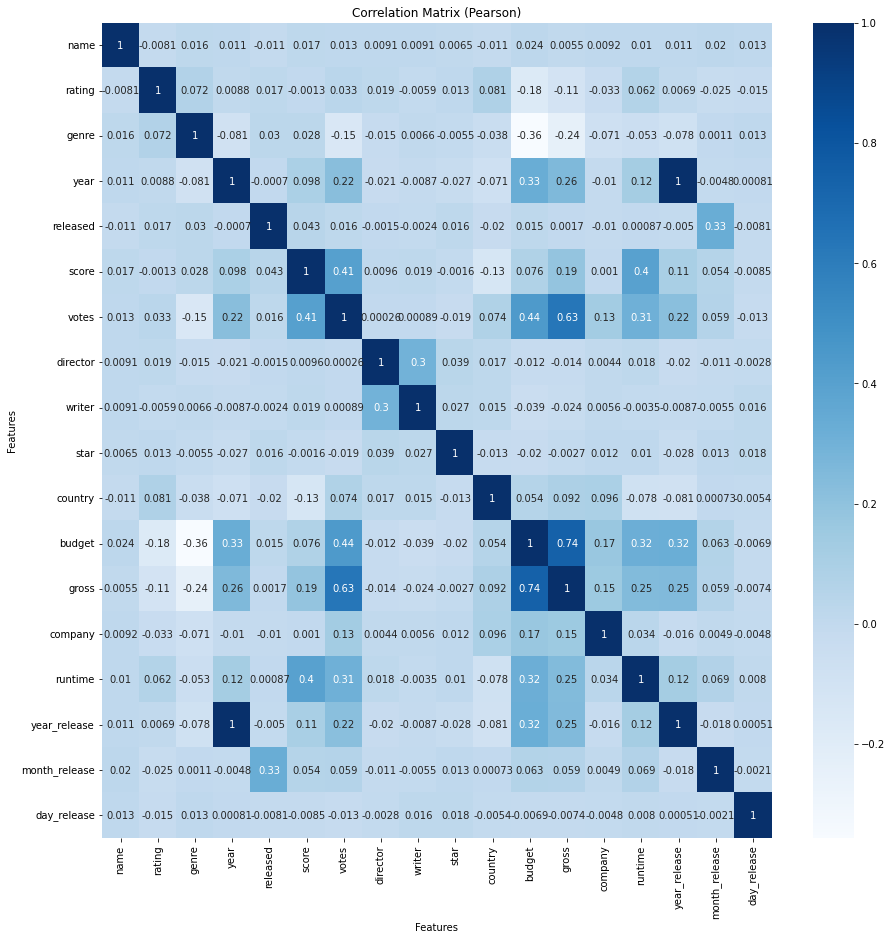

In [43]:
# making a correlation matrix, this time using the categorical data

correlation_v2 = df_numerized.corr(method='pearson')

sns.heatmap(correlation_v2, annot=True, cbar=True, cmap='Blues')

plt.title('Correlation Matrix (Pearson)')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [44]:
correlation_v2_pairs = correlation_v2.unstack()

correlation_v2_pairs

name           name             1.000000
               rating          -0.008069
               genre            0.016355
               year             0.011453
               released        -0.011311
               score            0.017097
               votes            0.013088
               director         0.009079
               writer           0.009081
               star             0.006472
               country         -0.010737
               budget           0.023970
               gross            0.005533
               company          0.009211
               runtime          0.010392
               year_release     0.010900
               month_release    0.019874
               day_release      0.012790
rating         name            -0.008069
               rating           1.000000
               genre            0.072423
               year             0.008779
               released         0.016613
               score           -0.001314
               v

In [45]:
correlation_v2_pairs_sorted = correlation_v2_pairs.sort_values()

correlation_v2_pairs_sorted

budget         genre           -0.356564
genre          budget          -0.356564
gross          genre           -0.235650
genre          gross           -0.235650
budget         rating          -0.176002
rating         budget          -0.176002
votes          genre           -0.145307
genre          votes           -0.145307
score          country         -0.133348
country        score           -0.133348
gross          rating          -0.107339
rating         gross           -0.107339
country        year_release    -0.081448
year_release   country         -0.081448
genre          year            -0.081261
year           genre           -0.081261
country        runtime         -0.078412
runtime        country         -0.078412
year_release   genre           -0.077751
genre          year_release    -0.077751
company        genre           -0.071067
genre          company         -0.071067
year           country         -0.070938
country        year            -0.070938
runtime        g

In [46]:
# After all we found a high correlation between budget and gross income
# Also between gross income and votes